In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras_preprocessing.image import ImageDataGenerator
from keras.models import load_model
from keras import optimizers
from keras.utils.np_utils import *

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
dir = Path('D:/aaaaaaaaaaaaaaaaa/nus/fyp/Q2A-master/Q2A-master/encoder/configs/data/assistq/train')
filepaths = list(dir.glob(r'**/images/*.jpg'))

labels = list(map(lambda l: os.path.split(os.path.split(l)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='FilePaths').astype(str)

labels = pd.Series(labels, name='Labels').astype(str)

df = pd.merge(filepaths, labels, right_index=True, left_index=True)
df = df[df['Labels'].apply(lambda l: l[-2:] != 'GT')]
df = df.sample(frac=1).reset_index(drop=True)
df

NameError: name 'os' is not defined

In [7]:
X_train, X_test = train_test_split(df, test_size=0.3, stratify=df['Labels'])

print('Shape of Train Data: ', X_train.shape)
print('Shape of Test Data: ', X_test.shape)

Shape of Train Data:  (11909, 2)
Shape of Test Data:  (5104, 2)


In [8]:
X_train, X_val = train_test_split(X_train, test_size=0.4,stratify=X_train['Labels'])

print('Shape of Train Data: ', X_train.shape)
print('Shape of Val Data: ', X_val.shape)

Shape of Train Data:  (7145, 2)
Shape of Val Data:  (4764, 2)


In [10]:
BATCH_SIZE = 32

IMG_SIZE = (150, 150)

img_data_gen = ImageDataGenerator(rescale=1./255,rotation_range=50,width_shift_range=0.3,
                                  height_shift_range=0.3,shear_range=0.3,zoom_range=0.3,
                                  horizontal_flip=True,fill_mode='nearest')
X_train = img_data_gen.flow_from_dataframe(dataframe=X_train,
                                          x_col='FilePaths',y_col='Labels',target_size=IMG_SIZE,color_mode='rgb',
                                          class_mode='categorical',batch_size=BATCH_SIZE,seed=42)
X_val = img_data_gen.flow_from_dataframe(dataframe=X_val,x_col='FilePaths',y_col='Labels',
                                          target_size=IMG_SIZE,color_mode='rgb',class_mode='categorical',batch_size=BATCH_SIZE,
                                          seed=42)
X_test = img_data_gen.flow_from_dataframe(dataframe=X_test,x_col='FilePaths',y_col='Labels',
                                          target_size=IMG_SIZE,color_mode='rgb',
                                          class_mode='categorical',batch_size=BATCH_SIZE,
                                          seed=42)

Found 7145 validated image filenames belonging to 6 classes.
Found 4764 validated image filenames belonging to 6 classes.
Found 5104 validated image filenames belonging to 6 classes.


START: OWN CODE

In [19]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size= (3,3) ,input_shape=(150,150,3),))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,))
#CNN 2 layers
model.add(Conv2D(filters=64,kernel_size=(3,3),))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,))

#CNN 3 layers
model.add(Conv2D(filters=128,kernel_size=(3,3),))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,))
#Full connection layer 1
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

#Full connection layer 2
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(6))#output
model.add(Activation('softmax'))#activation

model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),
               loss="categorical_crossentropy",
               metrics=["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 activation_24 (Activation)  (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 activation_25 (Activation)  (None, 72, 72, 64)        0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                 

END: OWN CODE

In [20]:
h1 = model.fit(X_train, validation_data=X_val,epochs=30, )
model.save('lwl41.h5')

Epoch 1/30
224/224 [==============================] - 211s 936ms/step - loss: 1.3653 - accuracy: 0.4474 - val_loss: 1.1974 - val_accuracy: 0.5300
Epoch 2/30
224/224 [==============================] - 230s 1s/step - loss: 1.1897 - accuracy: 0.5394 - val_loss: 1.3777 - val_accuracy: 0.4811
Epoch 3/30
224/224 [==============================] - 225s 1s/step - loss: 1.1402 - accuracy: 0.5566 - val_loss: 1.0978 - val_accuracy: 0.5777
Epoch 4/30
224/224 [==============================] - 247s 1s/step - loss: 1.1055 - accuracy: 0.5737 - val_loss: 1.0778 - val_accuracy: 0.5825
Epoch 5/30
224/224 [==============================] - 238s 1s/step - loss: 1.0804 - accuracy: 0.5847 - val_loss: 1.0844 - val_accuracy: 0.5796
Epoch 6/30
224/224 [==============================] - 238s 1s/step - loss: 1.0433 - accuracy: 0.6015 - val_loss: 1.1286 - val_accuracy: 0.5756
Epoch 7/30
224/224 [==============================] - 277s 1s/step - loss: 1.0146 - accuracy: 0.6160 - val_loss: 1.0450 - val_accuracy: 0.5

In [38]:
accuracy = h1.history['accuracy']
loss = h1.history['loss']
val_loss = h1.history['val_loss']
val_accuracy = h1.history['val_accuracy']
print(accuracy)
print(val_accuracy)
print(loss)
print(val_loss)

[0.4474457800388336, 0.539398193359375, 0.556613028049469, 0.5736879110336304, 0.5847445726394653, 0.6015395522117615, 0.6159552335739136, 0.615535318851471, 0.6264520883560181, 0.6335899233818054, 0.6452064514160156, 0.6494051814079285, 0.6554234027862549, 0.6634010076522827, 0.6662001609802246, 0.6734779477119446, 0.6722183227539062, 0.6766970157623291, 0.6849545240402222, 0.6869139075279236, 0.6911126375198364, 0.6898530721664429, 0.6936318874359131, 0.6975507140159607, 0.6997900605201721, 0.7031490802764893, 0.7065080404281616, 0.7076277136802673, 0.721203625202179, 0.7237228751182556]
[0.5300167798995972, 0.48110830783843994, 0.5776658058166504, 0.5824937224388123, 0.5795549750328064, 0.5755667686462402, 0.5999160408973694, 0.6406381130218506, 0.6439966559410095, 0.6484047174453735, 0.6614189743995667, 0.6704450249671936, 0.6622586250305176, 0.6752728819847107, 0.6679261326789856, 0.6792611479759216, 0.6696053743362427, 0.6861881017684937, 0.6842989325523376, 0.6589000821113586, 0

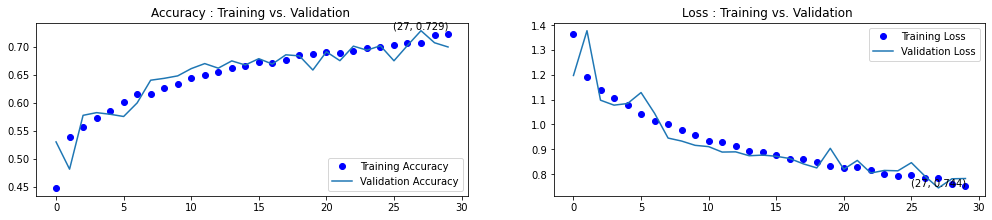

In [37]:
accuracy = h1.history['accuracy']
loss = h1.history['loss']
val_loss = h1.history['val_loss']
val_accuracy = h1.history['val_accuracy']
plt.figure(figsize=(17, 7))
plt.subplot(2, 2, 1)
plt.plot(range(30), accuracy,'bo', label='Training Accuracy')
plt.plot(range(30), val_accuracy, label='Validation Accuracy')
plt.text(27,0.729,(27,0.729),ha='center', va='bottom', fontsize=10)
plt.legend(loc='lower right')
plt.title('Accuracy : Training vs. Validation ')
plt.subplot(2, 2, 2)
plt.plot(range(30), loss,'bo' ,label='Training Loss')
plt.plot(range(30), val_loss, label='Validation Loss')
plt.text(27,0.744,(27,0.744),ha='center', va='bottom', fontsize=10)
plt.title('Loss : Training vs. Validation ')
plt.legend(loc='upper right')
plt.savefig("cnn.png")
plt.show()

1/1 [==============================] - 0s 344ms/step
[[1.0000000e+00 1.2529589e-11 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00]]
street


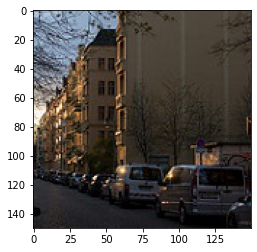

In [41]:
# prediction
from PIL import Image
from keras.utils import image_utils
def con(file,outdir,w=150,h=150):
    img1=Image.open(file)
    img2=img1.resize((w,h),Image.BILINEAR)
    img2.save(os.path.join(outdir,os.path.basename(file)))
file='D:/aaaaaaaaaaaaaaaaa/nus/4300/Q1Q2Q3/archive/image/1street/2.jpg'
con(file,'E:/')
model=load_model('lwl100.h5')
img_path='D:/aaaaaaaaaaaaaaaaa/nus/4300/Q1Q2Q3/archive/image/1street/2.jpg'
img = image_utils.load_img(img_path,target_size=(150,150))
img = image_utils.img_to_array(img)
img = np.expand_dims(img, axis=0)
out = model.predict(img)
print(out)
dict={'0':'street','1':'buildings','2':'forest','3':'glacier','4':'mountain','5':'sea'}
for i in range(5):
    if out[0][i]>0.5:
        print(dict[str(i)])
img=plt.imread('D:/aaaaaaaaaaaaaaaaa/nus/4300/Q1Q2Q3/archive/image/1street/2.jpg')
plt.imshow(img)

In [39]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
h1 = model.fit(X_train, validation_data=X_val,
               epochs=100, )
#保存模型
model.save('lwl100.h5')

Epoch 1/100
224/224 [==============================] - 212s 940ms/step - loss: 0.7414 - accuracy: 0.7213 - val_loss: 0.8161 - val_accuracy: 0.6910
Epoch 2/100
224/224 [==============================] - 193s 864ms/step - loss: 0.7387 - accuracy: 0.7279 - val_loss: 0.7520 - val_accuracy: 0.7217
Epoch 3/100
224/224 [==============================] - 193s 863ms/step - loss: 0.7309 - accuracy: 0.7316 - val_loss: 0.7377 - val_accuracy: 0.7284
Epoch 4/100
224/224 [==============================] - 179s 801ms/step - loss: 0.7278 - accuracy: 0.7250 - val_loss: 0.7178 - val_accuracy: 0.7273
Epoch 5/100
224/224 [==============================] - 191s 853ms/step - loss: 0.7294 - accuracy: 0.7285 - val_loss: 0.7157 - val_accuracy: 0.7366
Epoch 6/100
224/224 [==============================] - 181s 808ms/step - loss: 0.7048 - accuracy: 0.7426 - val_loss: 0.7758 - val_accuracy: 0.7217
Epoch 7/100
224/224 [==============================] - 182s 811ms/step - loss: 0.7158 - accuracy: 0.7376 - val_loss: 0

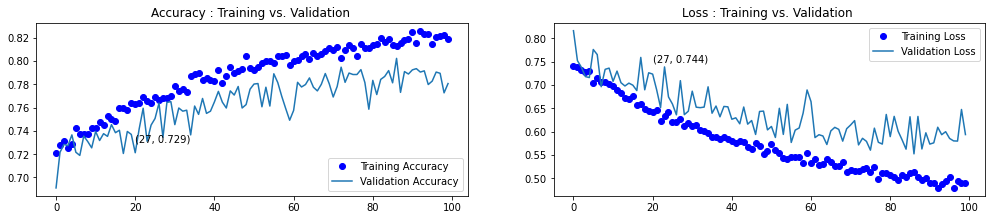

In [43]:
accuracy = h1.history['accuracy']
loss = h1.history['loss']
val_loss = h1.history['val_loss']
val_accuracy = h1.history['val_accuracy']
plt.figure(figsize=(17, 7))
plt.subplot(2, 2, 1)
plt.plot(range(100), accuracy,'bo', label='Training Accuracy')
plt.plot(range(100), val_accuracy, label='Validation Accuracy')
plt.text(27,0.729,(27,0.729),ha='center', va='bottom', fontsize=10)
plt.legend(loc='lower right')
plt.title('Accuracy : Training vs. Validation ')
plt.subplot(2, 2, 2)
plt.plot(range(100), loss,'bo' ,label='Training Loss')
plt.plot(range(100), val_loss, label='Validation Loss')
plt.text(27,0.744,(27,0.744),ha='center', va='bottom', fontsize=10)
plt.title('Loss : Training vs. Validation ')
plt.legend(loc='upper right')
plt.savefig("cnn.png")
plt.show()

In [44]:
accuracy = h1.history['accuracy']
loss = h1.history['loss']
val_loss = h1.history['val_loss']
val_accuracy = h1.history['val_accuracy']
print(accuracy)
print(val_accuracy)
print(loss)
print(val_loss)

[0.7213435769081116, 0.7279216051101685, 0.7315605282783508, 0.724982500076294, 0.7284814715385437, 0.7426171898841858, 0.7375787496566772, 0.7372987866401672, 0.737018883228302, 0.7427572011947632, 0.7423372864723206, 0.7476556897163391, 0.7449964880943298, 0.7529740929603577, 0.7503148913383484, 0.7484954595565796, 0.7596920728683472, 0.7592722177505493, 0.7575927376747131, 0.7643107175827026, 0.7627711892127991, 0.7640308141708374, 0.769349217414856, 0.7654303908348083, 0.76417076587677, 0.769349217414856, 0.7666900157928467, 0.767949640750885, 0.7682295441627502, 0.770048975944519, 0.7788663506507874, 0.7739678025245667, 0.7757872343063354, 0.7736878991127014, 0.7874037623405457, 0.7892232537269592, 0.7893632054328918, 0.7840448021888733, 0.7855843305587769, 0.7836248874664307, 0.782785177230835, 0.7921623587608337, 0.7808257341384888, 0.7868439555168152, 0.794821560382843, 0.7896431088447571, 0.7914625406265259, 0.7935619354248047, 0.8041987419128418, 0.7941217422485352, 0.7924422